# Situação de casos de dengue no Brasil em 2024

## Problema

No ano de 2024 ocorreu uma epidemia de dengue, com um número de casos muito superior aos anos anteriores. É necessário uma análise descritiva dos casos por regiões, estados, sexo e número total de casos ao longo ano para conhecer realmente o perfil no país para crianças e adolescrentes de 10 a 14 anos. 

A seguir apresento os passos utilizados no processo de ETL

### Fonte dos dados

- A base de dados de dengue foi disponibilizada pelo Sistema de Informação de Agravos de Notificação(SINAN) do Ministério da Saúde via a plataforma Portal de Dados Abertos do SUS.
- Os dados foram baixados pela plataforma mencionada no formato CSV.
- Os dados sobre a população foram disponibilizados pelo IBGE e baixados pelo site do DataSUS

Importar bibliotecas que serão utilizadas

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Carregando dados

In [22]:
# Importar dados pandas
dados = pd.read_csv("dados/DENG24_idade.csv", sep = ";")

### Transformar dados

Segundo o dicionário de dados de dengue, disponibilizado pelo SINAN, as colunas de interesse para a análise são:
- Data: dt_notific
- Sexo: cs_sexo
- Estado: sg_uf

In [23]:
# Selecionar colunas de interesse para análise
filtro = ["DT_NOTIFIC", "CS_SEXO", "SG_UF"]
dados_filtro = dados[filtro]

# Trocar o código do Estado para nome do Estado
codigo_estado = {
    12:"Acre", 27:"Alagoas", 16:"Amapá", 13:"Amazonas", 29:"Bahia", 23:"Ceará", 53:"Distrito Federal", 32:"Espírito Santo", 52:"Goiás", 
    21:"Maranhão", 51:"Mato Grosso", 50:"Mato Grosso do Sul", 31:"Minas Gerais", 15:"Pará", 25:"Paraíba", 41:"Paraná", 26:"Pernambuco", 
    22:"Piauí", 24:"Rio Grande do Norte", 43:"Rio Grande do Sul", 33:"Rio de Janeiro", 11:"Rondônia", 14:"Roraima", 42:"Santa Catarina", 
    35:"São Paulo", 28:"Sergipe", 17:"Tocantins"
    }
dados_filtro["SG_UF"] = dados_filtro["SG_UF"].map(codigo_estado)
dados_filtro = dados_filtro.rename(columns = {"SG_UF": "Estados"})

# Adicionar a coluna Região
regiao = {
    "Acre":"Norte", "Alagoas":"Nordeste", "Amapá":"Norte", "Amazonas":"Norte", "Bahia":"Nordeste", "Ceará":"Nordeste",
    "Distrito Federal":"Centro_Oeste", "Espírito Santo":"Sudeste", "Goiás":"Centro_Oeste", "Maranhão":"Nordeste", 
    "Mato Grosso":"Centro_Oeste", "Mato Grosso do Sul":"Centro_Oeste", "Minas Gerais":"Sudeste", "Pará":"Norte", "Paraíba":"Nordeste", 
    "Paraná":"Sul", "Pernambuco":"Nordeste", "Piauí":"Nordeste", "Rio Grande do Norte":"Nordeste", "Rio Grande do Sul":"Sul", 
    "Rio de Janeiro":"Sudeste", "Rondônia":"Norte", "Roraima":"Norte", "Santa Catarina":"Sul"," São Paulo":"Sudeste", 
    "Sergipe":"Nordeste", "Tocantins":"Norte"
}
dados_filtro["Região"] = dados_filtro["Estados"].map(regiao)

# Trocar código coluna sexo
codigo_sexo = {
    "M":"Masculino", "F":"Feminino"
}
dados_filtro["CS_SEXO"] = dados_filtro["CS_SEXO"].map(codigo_sexo)
dados_filtro = dados_filtro.rename(columns = {"CS_SEXO":"Sexo"})

C:\Users\emers\AppData\Local\Temp\ipykernel_20752\3238207827.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtro["SG_UF"] = dados_filtro["SG_UF"].map(codigo_estado)


### Realizando a EDA

- Total de casos
- Casos por sexo
- Casos por região
- Casos por estado


In [24]:
#Contar o número de casos a partir do número de linhas da coluna data
cont_casos = len(dados_filtro["DT_NOTIFIC"])
print(f"o número de casos é", cont_casos)

# Contar o número de casos por sexo, estado e região
cont_sexo = dados_filtro["Sexo"].value_counts()
cont_estado = dados_filtro["Estados"].value_counts()
cont_regiao = dados_filtro["Região"].value_counts()

o número de casos é 440264


#### Calcular incidência de casos novos de dengue por Estado no Brasil em 2024

Gerando uma série com dados da população residente por Estado no ano de 2024 e calculando a incidência de casos para 100.000 habitantes

In [25]:
pop = {
    "Rondônia": 1746227, "Acre": 880631, "Amazonas": 4281209, "Roraima": 716793, "Pará": 8664306, "Amapá": 802837, "Tocantins": 1577342, 
    "Maranhão": 7010960, "Piauí": 3375646, "Ceará": 9233656, "Rio Grande do Norte": 3446071, "Paraíba": 4145040, "Pernambuco": 9539029, 
    "Alagoas": 3220104, "Sergipe": 2291077, "Bahia": 14850513, "Minas Gerais": 21322691, "Espírito Santo": 4102129, "Rio de Janeiro": 17219679, 
    "São Paulo": 45973194, "Paraná": 11824665, "Santa Catarina": 8058441, "Rio Grande do Sul": 11229915, "Mato Grosso do Sul": 2901895, 
    "Mato Grosso": 3836399, "Goiás": 7350483, "Distrito Federal": 2982818
}
pop2024 = pd.Series(pop)

incid_estado = (cont_estado / pop2024) * 100000

#### Organizar casos por mês

In [26]:
dados_filtro["DT_NOTIFIC"] = pd.to_datetime(dados_filtro["DT_NOTIFIC"])
dados_data = dados_filtro["DT_NOTIFIC"].dt.to_period("M").value_counts().sort_index()

### Gerar Gráficos

Gráficos de casos de dengue:
- Incidência de casos por Estado a cada 100.000 habitantes
- Total de casos por Região
- Total de casos por sexo

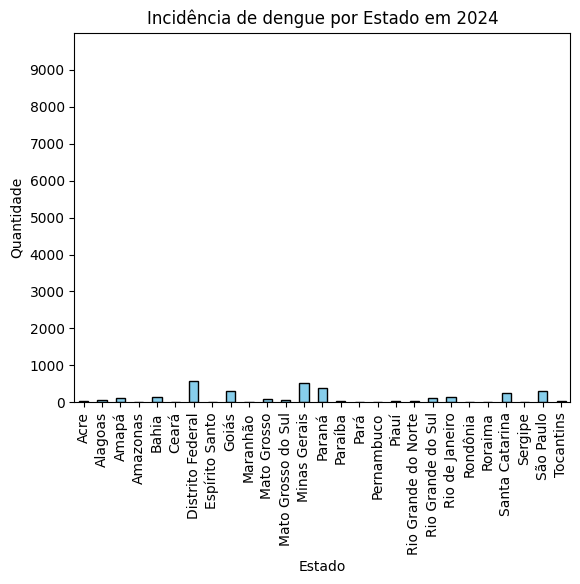

In [27]:
#grafico de incidência por estado
incid_estado.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Incidência de dengue por Estado em 2024")
plt.xlabel("Estado")
plt.ylabel("Quantidade")
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 10000, 1000))
plt.ylim(0, 10000)
plt.show()

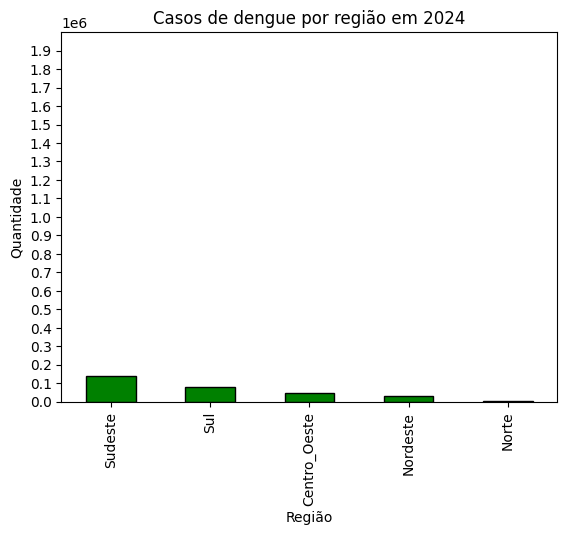

In [28]:
#grafico de casos por região
cont_regiao.plot(kind="bar", color="green", edgecolor="black")

plt.title("Casos de dengue por região em 2024")
plt.xlabel("Região")
plt.ylabel("Quantidade")
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 2000000, 100000))
plt.ylim(0, 2000000)
plt.show()

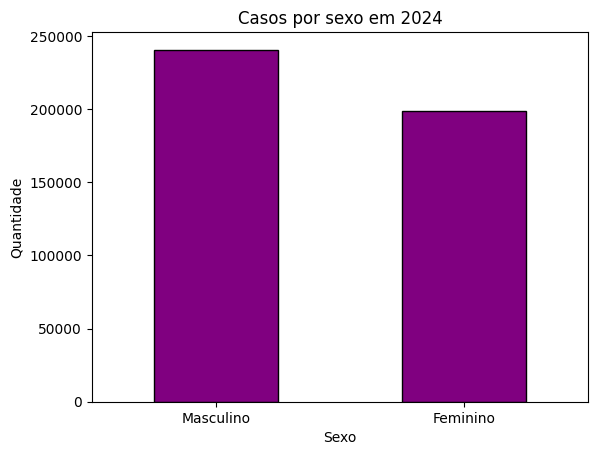

In [29]:
#grafico de casos por sexo
cont_sexo.plot(kind="bar", color = "purple", edgecolor = "black")

plt.title("Casos por sexo em 2024")
plt.xlabel("Sexo")
plt.ylabel("Quantidade")
plt.xticks(rotation = 0)
plt.show()

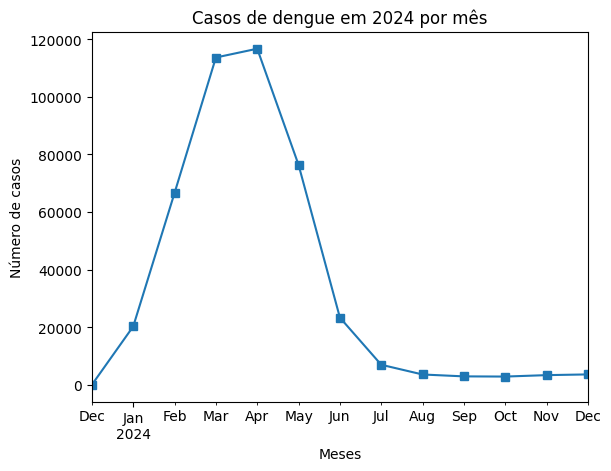

In [30]:
#gráfico de casos por mês
dados_data.plot(kind='line', marker='s')
plt.title("Casos de dengue em 2024 por mês")
plt.xlabel("Meses")
plt.ylabel("Número de casos")
plt.show()

## Referências

- Esta análise de dados foi feita como atividade do bootcamp Ciência de Dados com Python da DIO + Santander.
- Os dados sobre dengue no Brasil no ano de 2024 foram baixados pelo [Dados Abertos do SUS](https://dadosabertos.saude.gov.br/) e editados via SQLite3.
- Os dados sobre a população por Estado foram coletados pelo [DataSUS](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?ibge/cnv/popsvs2024br.def)